## Project Data Science - Preprossing & Cleaning  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. [Introduction](#1)
    - 1.1 [Data Dictionary](#2)
    - 1.2 [Task](#3)
2. [Preparation](#4)
    - 2.1 [Packages](#5)
    - 2.2 [Data](#6)
    - 2.3 [Understanding Data](#7)
    - 2.4 [Data Cleaning and formatting ](#8)
    
3. [Features data values manipulation](#9)
    - 3.1 [BARADMISSIONID](#10)
    - 3.2 [Patient Sex](#11)
    - 3.3 [Marital Status](#12)
    - 3.4 [Divide DataFrame](#13)
    - 3.5 [Creatinine Result](#14)
    - 3.6 [Creatinine Flag](#15)
    - 3.7 [FBS Result](#16)
    - 3.8 [FBS Flag](#17)
    - 3.9 [HB A1C Result](#18)
    - 3.10 [HB A1C Flag](#19)
    - 3.11 [HDL Result](#20)
    - 3.12 [HDL Flag](#21)
    - 3.13 [LDL Result](#22)
    - 3.14 [LDL Flag](#23)
    - 3.15 [Concatenate DataFrames](#24)
    
4. [Exploratory Data Analysis](#25)
    - 4.1 [Percentage of Patient Sex](#26)
    - 4.2 [Count of Marital Status ](#27)
    - 4.3 [Normality Flag For each test Based on Gender](#28)
    - 4.4 [Relationship between features](#29)
    - 4.5 [Descriptive Statistics for Results Based on Gender and normality flag](#30)
    - 4.6 [Correlation between features based on gender](#31)
    

### 1. Introduction <a id=1></a>

#### 1.1 Data Dictionary <a id=2></a>

`1-BARADMISSIONID`-Patient admission ID <BR>
`2-Patient Sex` - gender of patient<BR>
`3-Marital Status`- Marital Status of patient<BR>
`4-Creatinine Result` - result of Creatinine test<BR>
`5-NORMALITYFLAG` -Normality flag of Creatinine test (N : normal - H: High - L:Low)<BR>
`6-Fasting Blood sugar  Result` - is the Fasting Blood Sugar test<BR>
`7-NORMALITYFLAG.1 `- Normality flag of FBS test (N : normal - H: High - L:Low)<BR>
`8-HB A1C Result` - The average blood glucose (sugar) level for the last two to three months test.<BR>
`9-NORMALITYFLAG.2` - Normality flag of HB A1C test (N : normal - H: High - L:Low)<BR>
`10-HDL Result ` - (high-density lipoprotein), or “good” cholesterol tset result<BR>
`11-NORMALITYFLAG.3` - Normality flag of (high-density lipoprotein) test (N : normal - H: High - L:Low)<BR>
`12-LDL Result`- (low-density lipoprotein), sometimes called “bad” cholesterol test result.<BR>
`13-NORMALITYFLAG.4` - Normality flag of (low-density lipoprotein) test (N : normal - H: High - L:Low)<BR>

#### 1.2 Task <a id=3></a>
 - To prepare and clean the dataset (Raw_Data.xlsx), explore the dataset (visualization and statistical analysis) 

### 2. Preparation <a id=4></a>

#### 2.1 Packages <a id=5></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re 
%matplotlib inline

pd.options.mode.chained_assignment = None
# i use this code to stop warning messege

background_color = "#F2F2F2"
color_palette = ["#7456A3","#08BEDF","#008DC3"]
sns.set_style("whitegrid" )
sns.set_theme(style="ticks")
sns.set_palette(color_palette)

#### 2.2 Data <a id=6></a>

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/ml_case_studies/Raw_Data.xlsx',skiprows=1)

#### 2.3 Understanding Data <a id=7></a>

##### 2.3.1 The shape of the data

In [ ]:
print("The shape of the dataset is : ", df.shape)

The shape of the dataset is :  (3669, 13)


##### 2.3.2 Preview of the first 5 rows of the data

In [ ]:
df.head()

,BARADMISSIONID,Patient Sex,Marital Status,Creatinine Result,NORMALITYFLAG,Fasting Blood sugar Result,NORMALITYFLAG.1,HB A1C Result,NORMALITYFLAG.2,HDL Result,NORMALITYFLAG.3,LDL Result,NORMALITYFLAG.4
0,20203452,F,Widowed,1.4,H,286,N,repeat,N,NaN,N,NaN,N
1,20203457,Female,U+1F600,-10,NaN,NaN,NaN,not read,NaN,NaN,NLH,NaN,NaN
2,20203462,Female,NaN,0.8,N,104,N,9.7,H,na,N,na,N
3,20203467,Female,M (MARRIED),0.8,N,191,N,9.4,N,na,N,na,N
4,20203472,F,M,0.85,N,155,N,9.1,H,na,N,na,N


##### 2.3.3 Preview of the last 5 rows of the data

In [ ]:
df.tail()

,BARADMISSIONID,Patient Sex,Marital Status,Creatinine Result,NORMALITYFLAG,Fasting Blood sugar Result,NORMALITYFLAG.1,HB A1C Result,NORMALITYFLAG.2,HDL Result,NORMALITYFLAG.3,LDL Result,NORMALITYFLAG.4
3664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3666,variables,x,y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3667,description,int,cat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3668,Stats,???,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### 2.3.4 Checking the number of unique values in each column

In [ ]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
BARADMISSIONID,3666
Patient Sex,11
Marital Status,17
Creatinine Result,460
NORMALITYFLAG,5
Fasting Blood sugar Result,641
NORMALITYFLAG.1,4
HB A1C Result,232
NORMALITYFLAG.2,2
HDL Result,259


##### 2.3.5 Show the  information about Dataset 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3669 entries, 0 to 3668
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   BARADMISSIONID               3666 non-null   object
 1   Patient Sex                  3665 non-null   object
 2   Marital Status               2788 non-null   object
 3   Creatinine Result            3661 non-null   object
 4   NORMALITYFLAG                3659 non-null   object
 5   Fasting Blood sugar  Result  3659 non-null   object
 6   NORMALITYFLAG.1              3658 non-null   object
 7   HB A1C Result                3659 non-null   object
 8   NORMALITYFLAG.2              3658 non-null   object
 9   HDL Result                   3648 non-null   object
 10  NORMALITYFLAG.3              3660 non-null   object
 11  LDL Result                   3653 non-null   object
 12  NORMALITYFLAG.4              3658 non-null   object
dtypes: object(13)
memory usage: 372.8

##### 2.3.6 Summary statistics

In [ ]:
df.describe()

,BARADMISSIONID,Patient Sex,Marital Status,Creatinine Result,NORMALITYFLAG,Fasting Blood sugar Result,NORMALITYFLAG.1,HB A1C Result,NORMALITYFLAG.2,HDL Result,NORMALITYFLAG.3,LDL Result,NORMALITYFLAG.4
count,3666,3665,2788,3661,3659,3659,3658,3659,3658,3648,3660,3653,3658
unique,3666,11,17,460,5,641,4,232,2,259,5,342,3
top,20203452,F,Married,0.7,N,160,H,7.0,H,44,N,79,N
freq,1,2127,2212,361,2264,30,2225,103,1977,126,3439,50,3139


##### 2.3.7 Show duplicated rows

In [ ]:
df.duplicated().sum()
#to know the duplicated and sum of them 

2

In [ ]:
df[df.duplicated()]

,BARADMISSIONID,Patient Sex,Marital Status,Creatinine Result,NORMALITYFLAG,Fasting Blood sugar Result,NORMALITYFLAG.1,HB A1C Result,NORMALITYFLAG.2,HDL Result,NORMALITYFLAG.3,LDL Result,NORMALITYFLAG.4
3664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- we find the duplicated and indexing it , its full of nan , so we dropped it 

##### 2.3.8 Missing values

In [ ]:
df.isna().sum()
# we found here the sum of nan values 

BARADMISSIONID                   3
Patient Sex                      4
Marital Status                 881
Creatinine Result                8
NORMALITYFLAG                   10
Fasting Blood sugar  Result     10
NORMALITYFLAG.1                 11
HB A1C Result                   10
NORMALITYFLAG.2                 11
HDL Result                      21
NORMALITYFLAG.3                  9
LDL Result                      16
NORMALITYFLAG.4                 11
dtype: int64

##### 2.3.9 Show columns

In [ ]:
df.columns

Index(['BARADMISSIONID', 'Patient Sex', 'Marital Status', 'Creatinine Result',
       'NORMALITYFLAG', 'Fasting Blood sugar  Result', 'NORMALITYFLAG.1',
       'HB A1C Result', 'NORMALITYFLAG.2', 'HDL Result', 'NORMALITYFLAG.3',
       'LDL Result', 'NORMALITYFLAG.4'],
      dtype='object')

#### 2.4 Data cleaning and formatting <a id=8></a>

##### 2.4.1 Change columns names

In [ ]:
df.rename(columns={'BARADMISSIONID':'Bar_Admission_ID',\
                   'Patient Sex':'Patient_Sex',\
                   'Marital Status':'Marital_Status',\
                   'Creatinine Result':'Creatinine_Result',\
                   'NORMALITYFLAG':'Normality_Flag_Creatinie',\
                   'Fasting Blood sugar  Result':'Fasting_Blood_sugar_Result',\
                   'NORMALITYFLAG.1':'Normality_Flag_FBS',\
                   'HB A1C Result':'HB_A1C_Result',\
                   'NORMALITYFLAG.2':'Normality_Flag__HB_A1C',\
                   'HDL Result':'HDL_Result',\
                   'NORMALITYFLAG.3':'Normality_Flag__HDL',\
                   'LDL Result':'LDL_Result',\
                   'NORMALITYFLAG.4':'Normality_Flag__LDL'},inplace=True)

##### 2.4.2 Separating the columns based on its indication

In [ ]:
cat_cols = ['Patient_Sex','Marital_Status']
Results = ['Creatinine_Result','Fasting_Blood_sugar_Result','HB_A1C_Result','HDL_Result','LDL_Result']
Flags= ['Normality_Flag_Creatinie','Normality_Flag_FBS','Normality_Flag__HB_A1C','Normality_Flag__HDL','Normality_Flag__LDL']
print("--The categorial cols are :\n", cat_cols)
print("--The Columns contain tests results are :\n", Results)
print("--The Columns contain flags of tests results are : \n", Flags)


--The categorial cols are :
 ['Patient_Sex', 'Marital_Status']
--The Columns contain tests results are :
 ['Creatinine_Result', 'Fasting_Blood_sugar_Result', 'HB_A1C_Result', 'HDL_Result', 'LDL_Result']
--The Columns contain flags of tests results are : 
 ['Normality_Flag_Creatinie', 'Normality_Flag_FBS', 'Normality_Flag__HB_A1C', 'Normality_Flag__HDL', 'Normality_Flag__LDL']


##### 2.4.2  Drop Duplicates

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(3667, 13)

##### 2.4.3  Drop rows where all columns are NAN

In [ ]:
df.dropna(how='all',inplace=True)

In [ ]:
df.shape

(3666, 13)

##### 2.4.4 Drop rows that don't have any results

In [ ]:
df.dropna(how='all',inplace=True,subset=Results)

In [ ]:
df.shape

(3662, 13)

##### 2.4.5  Reset index

In [ ]:
df.reset_index(drop=True,inplace=True)

---------------------------------------------------------------------------------------------------

### 3 Features data values manipulation <a id=9></a>

#### 3.1.Bar_Admission_ID <a id=10></a>
i want to explore the feaure and find issues and solve it 

In [ ]:
df['Bar_Admission_ID'].value_counts()
# we try here to find if any of Bar_Admission_ID has repeat number 

20203452    1
20215617    1
20215627    1
20215632    1
20215637    1
           ..
20209577    1
20209582    1
20209587    1
20209592    1
20221762    1
Name: Bar_Admission_ID, Length: 3662, dtype: int64

In [ ]:
df['Bar_Admission_ID'].unique()
#we try here to find if any of Bar_Admission_ID has unique values 

array([20203452, 20203457, 20203462, ..., 20221752, 20221757, 20221762],
      dtype=object)

In [ ]:
df['Bar_Admission_ID'].nunique()
#we try here to find if any of Bar_Admission_ID has  number of unique values 

3662

In [ ]:
df['Bar_Admission_ID'].isna().sum()
# i found this column has no missing values 

0

In [ ]:
df['Bar_Admission_ID'].duplicated().sum()
# i try to find if there is duplicated rows 

0

---------------------------------------------------------------------------------------------------

#### 3.2.Patient_Sex  <a id=11></a>
i want to explore the feaure and find issues and solve it 

In [ ]:
df['Patient_Sex'].value_counts()
# we try here to find if any of Bar_Admission_ID has repeat number 

F         2127
M         1523
Female       5
Male         2
Man          2
women        1
female       1
Name: Patient_Sex, dtype: int64

i found some values has iterated , and i will replace it.  

In [ ]:
df['Patient_Sex'] = df['Patient_Sex'].str.replace('Female','F').str.replace('female','F').str.replace('women','F').str.replace('Man','M').str.replace('Male','M')
# i replace the values with spicific values i want 

In [ ]:
df['Patient_Sex'].value_counts()

F    2134
M    1527
Name: Patient_Sex, dtype: int64

In [ ]:
df['Patient_Sex'].isna().sum()
# ifound here missing value

1

In [ ]:
df[df['Patient_Sex'].isna()]

,Bar_Admission_ID,Patient_Sex,Marital_Status,Creatinine_Result,Normality_Flag_Creatinie,Fasting_Blood_sugar_Result,Normality_Flag_FBS,HB_A1C_Result,Normality_Flag__HB_A1C,HDL_Result,Normality_Flag__HDL,LDL_Result,Normality_Flag__LDL
47,20203692,NaN,NaN,-400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- i found that all of result is null except Creatinine_Result , so i'll drop it

In [ ]:
df = df.drop(labels=[47], axis=0)

now : i want to change the type of this columns to category , because it is 2 values 

In [ ]:
df['Patient_Sex'] = df['Patient_Sex'].astype('category')

In [ ]:
df.reset_index(drop=True)

,Bar_Admission_ID,Patient_Sex,Marital_Status,Creatinine_Result,Normality_Flag_Creatinie,Fasting_Blood_sugar_Result,Normality_Flag_FBS,HB_A1C_Result,Normality_Flag__HB_A1C,HDL_Result,Normality_Flag__HDL,LDL_Result,Normality_Flag__LDL
0,20203452,F,Widowed,1.4,H,286,N,repeat,N,NaN,N,NaN,N
1,20203457,F,U+1F600,-10,NaN,NaN,NaN,not read,NaN,NaN,NLH,NaN,NaN
2,20203462,F,NaN,0.8,N,104,N,9.7,H,na,N,na,N
3,20203467,F,M (MARRIED),0.8,N,191,N,9.4,N,na,N,na,N
4,20203472,F,M,0.85,N,155,N,9.1,H,na,N,na,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3656,20221742,M,NaN,0.7,N,122,N,7.0,H,37,N,100,N
3657,20221747,M,Married,0.7,N,190,H,5.5,N,35,N,100,N
3658,20221752,M,NaN,1.4,H,122,H,5.2,N,33,N,100,N
3659,20221757,M,Married,0.2,L,279,H,9.2,H,32,L,100,N


---------------------------------------------------------------------------------------------------

#### 3.3 Marital_Status <a id=12></a>
i want to explore the feaure and find issues and solve it 

In [ ]:
df['Marital_Status'].isna().sum()
# i found 876 nan values in Marital_Status 

876

problem , the 876 is huge number , so we have to solve this issue 

In [ ]:
df[df['Marital_Status'].isna()]
# i want to explore the nan values 

,Bar_Admission_ID,Patient_Sex,Marital_Status,Creatinine_Result,Normality_Flag_Creatinie,Fasting_Blood_sugar_Result,Normality_Flag_FBS,HB_A1C_Result,Normality_Flag__HB_A1C,HDL_Result,Normality_Flag__HDL,LDL_Result,Normality_Flag__LDL
2,20203462,F,NaN,0.8,N,104,N,9.7,H,na,N,na,N
8,20203492,F,NaN,0.7,N,433.1,H,7.6,H,na,N,na,N
12,20203517,F,NaN,1.7,N,197,N,5.7,N,NaN,N,NaN,N
14,20203527,F,NaN,1.46,H,277,H,12.5,H,NaN,N,NaN,N
48,20203697,F,NaN,2.5,H,172,H,7.1,N,25.1,N,na,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,20221682,M,NaN,0.8,N,199,H,>14,N,50,N,100,N
3646,20221687,M,NaN,1.4,H,178,H,6.0,N,49,N,100,N
3657,20221742,M,NaN,0.7,N,122,N,7.0,H,37,N,100,N
3659,20221752,M,NaN,1.4,H,122,H,5.2,N,33,N,100,N


In [ ]:
df.loc[df[df['Marital_Status'].isna()].index,'Marital_Status']='unknown'

In [ ]:
df['Marital_Status'].isna().sum()

0

In [ ]:
df['Marital_Status'].value_counts()
# i found here many values doesn't know what is it , so want to explore it 

Married        2212
unknown         876
Widowed         392
Single          127
Divorced         25
Polygamous       13
M (MARRIED)       4
U+1F600           2
mmmmm             2
w                 2
M                 1
xxxxx             1
wwww              1
ssssssss          1
sssssssss         1
wwwww             1
Name: Marital_Status, dtype: int64

In [ ]:
df[~((df['Marital_Status'] == 'Married') | (df['Marital_Status'] == 'Widowed') | (df['Marital_Status'] == 'Single') | (df['Marital_Status'] == 'Divorced') | (df['Marital_Status'] == 'Polygamous')| (df['Marital_Status'] == 'unknown'))]

,Bar_Admission_ID,Patient_Sex,Marital_Status,Creatinine_Result,Normality_Flag_Creatinie,Fasting_Blood_sugar_Result,Normality_Flag_FBS,HB_A1C_Result,Normality_Flag__HB_A1C,HDL_Result,Normality_Flag__HDL,LDL_Result,Normality_Flag__LDL
1,20203457,F,U+1F600,-10,NaN,NaN,NaN,not read,NaN,NaN,NLH,NaN,NaN
3,20203467,F,M (MARRIED),0.8,N,191,N,9.4,N,na,N,na,N
4,20203472,F,M,0.85,N,155,N,9.1,H,na,N,na,N
5,20203477,F,U+1F600,-150,not read,no,NaN,unknown,NaN,NaN,NLH,NaN,NaN
6,20203482,F,M (MARRIED),1.1,H,186,H,8.9,H,na,N,na,N
7,20203487,F,M (MARRIED),0.76,N,338,N,8.2,H,na,N,na,N
9,20203502,F,M (MARRIED),1.66,H,469,H,6.2,N,na,N,na,N
17,20203542,F,xxxxx,1.8,N,225.2,H,12.2%,N,65,N,na,N
18,20203547,F,wwww,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,20203582,F,mmmmm,0.7,N,322,H,8.9,H,50,N,na,N


- We found that the rows with index 1,5,18 has Null values , we can delete it

In [ ]:
df = df.drop(labels=[1,5,18], axis=0)

- Replacing values that matching Married [M (MARRIED),mmmmm,M]

In [ ]:
df.loc[(df['Marital_Status'] == 'M (MARRIED)'),'Marital_Status']='Married'
df.loc[(df['Marital_Status'] == 'mmmmm'),'Marital_Status']='Married'
df.loc[(df['Marital_Status'] == 'M'),'Marital_Status']='Married'

In [ ]:
df.loc[(df['Marital_Status'] == 'sssssssss'),'Marital_Status']='Single'
df.loc[(df['Marital_Status'] == 'ssssssss'),'Marital_Status']='Single'

In [ ]:
df.loc[(df['Marital_Status'] == 'w'),'Marital_Status']='Widowed'
df.loc[(df['Marital_Status'] == 'wwwww'),'Marital_Status']='Widowed'

In [ ]:
df.loc[(df['Marital_Status'] == 'xxxxx'),'Marital_Status']='unknown'

In [ ]:
df['Marital_Status'].value_counts()

Married       2219
unknown        877
Widowed        395
Single         129
Divorced        25
Polygamous      13
Name: Marital_Status, dtype: int64

In [ ]:
df['Marital_Status'] = df['Marital_Status'].astype('category')

#### 3.4 Divide DataFrame  <a id=13></a>
 - Divide DataFrame into two dataFrams Based on gender

In [ ]:
df_group = df.groupby(df['Patient_Sex'])
# i want to split the dataframe by gender to two dataframes male and female 

In [ ]:
df_female = df_group.get_group('F')
df_female.reset_index(drop=True)

,Bar_Admission_ID,Patient_Sex,Marital_Status,Creatinine_Result,Normality_Flag_Creatinie,Fasting_Blood_sugar_Result,Normality_Flag_FBS,HB_A1C_Result,Normality_Flag__HB_A1C,HDL_Result,Normality_Flag__HDL,LDL_Result,Normality_Flag__LDL
0,20203452,F,Widowed,1.4,H,286,N,repeat,N,NaN,N,NaN,N
1,20203462,F,unknown,0.8,N,104,N,9.7,H,na,N,na,N
2,20203467,F,Married,0.8,N,191,N,9.4,N,na,N,na,N
3,20203472,F,Married,0.85,N,155,N,9.1,H,na,N,na,N
4,20203482,F,Married,1.1,H,186,H,8.9,H,na,N,na,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2126,20214107,F,Married,0.75,N,343,N,10,H,53,N,20,N
2127,20214112,F,unknown,1.0,N,107,N,7.8,H,51,N,20,N
2128,20214117,F,Widowed,0.7,N,139,N,7.4,H,44,N,20,N
2129,20214122,F,unknown,0.99,N,103,N,8.5,H,41,N,20,N


In [ ]:
df_male = df_group.get_group('M')
df_male.reset_index(drop=True)

,Bar_Admission_ID,Patient_Sex,Marital_Status,Creatinine_Result,Normality_Flag_Creatinie,Fasting_Blood_sugar_Result,Normality_Flag_FBS,HB_A1C_Result,Normality_Flag__HB_A1C,HDL_Result,Normality_Flag__HDL,LDL_Result,Normality_Flag__LDL
0,20214132,M,Married,0.9,N,201,N,9.1,H,55,N,199,H
1,20214137,M,Married,0.55,N,119,H,5.5,N,47,N,199,H
2,20214142,M,Married,0.89,N,184,N,10,H,39,N,199,N
3,20214147,M,Married,0.8,N,90.3,N,8.3%,N,136,H,199,H
4,20214152,M,unknown,0.51,N,156,H,7.3,H,60,N,196,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,20221742,M,unknown,0.7,N,122,N,7.0,H,37,N,100,N
1523,20221747,M,Married,0.7,N,190,H,5.5,N,35,N,100,N
1524,20221752,M,unknown,1.4,H,122,H,5.2,N,33,N,100,N
1525,20221757,M,Married,0.2,L,279,H,9.2,H,32,L,100,N


---------------------------------------------------------------------------------------------------

#### 3.5 Creatinine_Result  <a id=14></a>

##### 3.5.1 Creatinine_Result for male

In [ ]:
df_male['Creatinine_Result'].unique()

array(['0.9', '0.55', '0.89', '0.8', '0.51', '0.7', '6.6', '4.9', '0.80',
       '0.5', '1.5', '4.6', '0.6', '0.22', '1.8', '4.7', '2.9', '1.51',
       '2.0', '0.17', '0.56', '1.37', '0.61', '0.83', '2.5', '0.88',
       '0.82', '2.1', '1.72', '0.71', '3.02', '1.42', '1.2', '1.1',
       '0.76', '2.52', '3.6', '37', '0.15', '1.21', '1.28', '1.0', '2.16',
       '1.22', '10.93', '1.3', '5.7', '0.67', '0.64', '0.1', '5.5',
       '0.68', '0.70', '3.2', '0.63', '1.7', '0.46', '0.94', '1.29', '8',
       '3.3', '4.17', '1.6', '0.41', '0.13', '2.01', '0.4', '0.57',
       '1.05', '0.3', '0.59', '0.75', '2.04', '1.49', '3.5', '1.17',
       '1.04', '3.29', '4', '0.90', '1.96', '0.2', '1.09', '0.84', '2.83',
       '0.65', '0.72', '3.16', '0.92', '0.49', '2.6', '0.44', '2.3',
       '2.8', '2.84', '1.15', '2.96', '1.06', '5.13', '7.4', '7.8',
       '0.95', '0.91', '1.43', '1.47', '1.79', '1.34', '0.54', '5.22',
       '0.60', '0.79', '1.69', '0.69', '8.1', '1.16', '1.01', '0.93',
       '1.

In [ ]:
df_male['Creatinine_Result']=df_male['Creatinine_Result'].astype('str')

In [ ]:
df_male['Creatinine_Result']=df_male['Creatinine_Result'].str.strip()

In [ ]:
df_male['Creatinine_Result']=df_male['Creatinine_Result'].apply(pd.to_numeric, errors='coerce')

In [ ]:
df_male['Creatinine_Result'].isna().sum()

4

In [ ]:
df_male[df_male['Creatinine_Result'].isna()]

,Bar_Admission_ID,Patient_Sex,Marital_Status,Creatinine_Result,Normality_Flag_Creatinie,Fasting_Blood_sugar_Result,Normality_Flag_FBS,HB_A1C_Result,Normality_Flag__HB_A1C,HDL_Result,Normality_Flag__HDL,LDL_Result,Normality_Flag__LDL
2702,20216967,M,Married,NaN,N,183,H,11.6,N,57,N,132,H
3066,20218787,M,Married,NaN,N,216,N,10.4,H,31,N,119,N
3117,20219042,M,Married,NaN,N,155,H,6.5,H,90,H,116,N
3157,20219242,M,unknown,NaN,N,141,H,8.9,H,61,N,115,N


In [ ]:
df_male['Creatinine_Result'] = df_male['Creatinine_Result'].fillna(0.95)

##### 3.5.2 Creatinine_Result for female

In [ ]:
df_female['Creatinine_Result'].unique()

array(['1.4', '0.8', '0.85', '1.1', '0.76', '0.7', '1.66', '0.75', '0.77',
       '1.7', '0.92', '1.46', '0.9', '1.8', '00.99', '0.54', '1.5',
       '0.69', '0.6', '1.2', '1.24', '6.54', '2.5', '1.0', '0.5', '2.0',
       '0.78', '1.53', '4.08', '1.10', '0.47', '0.4', '4.33', '3.4',
       '2.3', '0.67', '1.06', '1.77', '1.37', '1.25', '5.0', '0.93',
       '1.54', '0.79', '0.57', '0.94', '3.2', '1.14', '0.86', '0.22',
       '0.45', '5.20', '0.72', '1.3', '2.88', '6.85', '1.11', '0.3',
       '1.86', '3', '0.21', '1.13', '3.65', '0.87', '0.70', '0.51', '2.2',
       '0.53', '1.38', '1.39', '7', '8.3', '1.01', '2.27', '0.55', '3.5',
       '0.12 done twice', '0.2', '0.84', '0.62', '0.24', '1.6', '1.9',
       '6.8', '1.09', '1', '1.27', '3.69', '1.56', '2.7', '4.82', '0.30',
       '0.73', '5.1', '1.43', '2.06', '0.36', '2.17', '2.11', '5.77',
       '0.82', '1.64', '0.91', '0.09', '1.41', '1.49', '0.97', '5.9',
       '1.68', '0.32', '1.36', '5', '2', '0.83', '0.52', '5.58', '2.45',


In [ ]:
df_female['Creatinine_Result']=df_female['Creatinine_Result'].astype('str')

In [ ]:
df_female['Creatinine_Result']=df_female['Creatinine_Result'].str.strip()

In [ ]:
df_female['Creatinine_Result']=df_female['Creatinine_Result'].apply(pd.to_numeric, errors='coerce')

In [ ]:
df_female['Creatinine_Result'].isna().sum()

14

In [ ]:
df_female[df_female['Creatinine_Result'].isna()]

,Bar_Admission_ID,Patient_Sex,Marital_Status,Creatinine_Result,Normality_Flag_Creatinie,Fasting_Blood_sugar_Result,Normality_Flag_FBS,HB_A1C_Result,Normality_Flag__HB_A1C,HDL_Result,Normality_Flag__HDL,LDL_Result,Normality_Flag__LDL
156,20204237,F,unknown,NaN,L,244,H,7.5,H,42,N,97,N
340,20205157,F,Widowed,NaN,N,167,H,8.0,H,53,N,92,N
718,20207047,F,Married,NaN,N,197,H,5.7,N,57,N,82,N
761,20207262,F,Married,NaN,N,88,N,6.1,N,55,N,81,N
853,20207722,F,Widowed,NaN,H,246,N,5.1%,N,41,N,79,N
897,20207942,F,Married,NaN,N,127,N,wwwww,N,35,N,78,N
1135,20209132,F,Married,NaN,N,279,H,10,H,70,N,71,N
1286,20209887,F,Widowed,NaN,N,150,H,6.4,N,68,N,66,N
1641,20211662,F,Married,NaN,N,91,N,7.0,H,33,N,55,N
1722,20212067,F,Married,NaN,N,376,H,10,N,86,H,51,N


In [ ]:
df_female.loc[df_female[(df_female['Creatinine_Result'].isna()) & (df_female['Normality_Flag_Creatinie']=='L')].index,'Creatinine_Result']=0.4

In [ ]:
df_female.loc[df_female[(df_female['Creatinine_Result'].isna()) & (df_female['Normality_Flag_Creatinie']=='N')].index,'Creatinine_Result']=0.7

In [ ]:
df_female.loc[df_female[(df_female['Creatinine_Result'].isna()) & (df_female['Normality_Flag_Creatinie']=='H')].index,'Creatinine_Result']=0.95

---------------------------------------------------------------------------------------------------

#### 3.6 Normality_Flag_Creatinie <a id=15></a>

##### 3.6.1 Normality_Flag_Creatinie for male

In [ ]:
df_male['Normality_Flag_Creatinie'].value_counts()

N    965
H    401
L    159
0      2
Name: Normality_Flag_Creatinie, dtype: int64

I HAVE AN ISSUE HERE 

In [ ]:
df_male[df_male['Normality_Flag_Creatinie']==0]

,Bar_Admission_ID,Patient_Sex,Marital_Status,Creatinine_Result,Normality_Flag_Creatinie,Fasting_Blood_sugar_Result,Normality_Flag_FBS,HB_A1C_Result,Normality_Flag__HB_A1C,HDL_Result,Normality_Flag__HDL,LDL_Result,Normality_Flag__LDL
2361,20215262,M,unknown,0.59,0,125.5,H,7.7 %,N,67,H,154,H
2981,20218362,M,Married,1.20,0,104,N,8.0,H,57,N,121,N


In [ ]:
df_male.loc[df_male[df_male['Bar_Admission_ID'] == 20215262].index,'Normality_Flag_Creatinie'] = 'L'
# repalce 0 value for this record to L in normality flag 

In [ ]:
df_male.loc[df_male[df_male['Bar_Admission_ID'] == 20218362].index,'Normality_Flag_Creatinie'] = 'N'
# repalce 0 value for this record to N in normality flag 

now : i explore the Criatinie result and compare it with Normality Flag Creatinie and be sure the value is correct 


In [ ]:
normality_flag0 = [(df_male['Creatinine_Result'] >= 0.7) & (df_male['Creatinine_Result'] <= 1.2),
              (df_male['Creatinine_Result'] > 1.2),
              (df_male['Creatinine_Result'] < 0.7)]
correct_flag = ['N', 'H', 'L']
df_male['Normality_Flag_Creatinie'] = np.select(normality_flag0, correct_flag , default='Not Good')

In [ ]:
df_male['Normality_Flag_Creatinie'].value_counts()

N    730
L    429
H    368
Name: Normality_Flag_Creatinie, dtype: int64

##### 3.6.2 Normality_Flag_Creatinie for female

In [ ]:
df_female['Normality_Flag_Creatinie'].value_counts()

N    1299
H     576
L     255
0       1
Name: Normality_Flag_Creatinie, dtype: int64

In [ ]:
df_female[df_female['Normality_Flag_Creatinie']==0]

,Bar_Admission_ID,Patient_Sex,Marital_Status,Creatinine_Result,Normality_Flag_Creatinie,Fasting_Blood_sugar_Result,Normality_Flag_FBS,HB_A1C_Result,Normality_Flag__HB_A1C,HDL_Result,Normality_Flag__HDL,LDL_Result,Normality_Flag__LDL
918,20208047,F,unknown,0.9,0,130,H,6%,N,58,N,77,N


In [ ]:
df_female.loc[df_female[df_female['Bar_Admission_ID'] == 20208047].index,'Normality_Flag_Creatinie'] = 'N'
# repalce 0 value for this record to N in normality flag 

In [ ]:
df_female['Normality_Flag_Creatinie'].value_counts()

N    1300
H     576
L     255
Name: Normality_Flag_Creatinie, dtype: int64

In [ ]:
normality_flag1 = [(df_female['Creatinine_Result'] >= 0.5) & (df_female['Creatinine_Result'] <= 0.9),
              (df_female['Creatinine_Result'] > 0.9),
              (df_female['Creatinine_Result'] < 0.5)]
correct_flag = ['N', 'H', 'L']
df_female['Normality_Flag_Creatinie'] = np.select(normality_flag1, correct_flag , default='Not Good')

In [ ]:
df_female['Normality_Flag_Creatinie'].isna().sum()

0

---------------------------------------------------------------------------------------------------

#### 3.7 Fasting_Blood_sugar_Result   <a id=16></a>

now : i try to find issue and fix it for Fasting blood sugar result in male data frame 

##### 3.7.1 Fasting_Blood_sugar_Result  for male

In [ ]:
df_male['Fasting_Blood_sugar_Result'].unique()

array(['201', '119', '184', '90.3', '156', '154', '116', '278', '229',
       '90', '335', '204', '314', '253', '395', '101', '121', '549.7',
       '261', '71', '179', '417 TWICE', '324', '190', '337', '118', '222',
       '187', '132', '131', '139', '199', '266', '128', '114.3', '324.9',
       '34', '205.8', '180', '202', '142', '116.3', '151', '145', '130',
       '162', '144', '124', '81', '158', '333', '249', '231', '430',
       '140', '288', '237', '133', '259', '127', '182', '198', '247',
       '290', '353', '310', '265', '106', '410', '250', '170', '165',
       '351', '109', '164', '189', '149', '163', '437', '185', '150',
       '369', '97', '134', '126', '203', '123', '187.2', '280', '152',
       '281', '161', '174', '283', '275', '194', '89.9', '82', '125.4',
       '205', '244', '108', '135', '122', '120', '147', '233', '99',
       '136', '234', '143', '73', '239', '93', '297', '92', '181', '178',
       '260', '105', '186', '76', '176', '248', '96', '183.0', '87.8',


In [ ]:
df_male['Fasting_Blood_sugar_Result']=df_male['Fasting_Blood_sugar_Result'].astype('str')

In [ ]:
df_male['Fasting_Blood_sugar_Result']=df_male['Fasting_Blood_sugar_Result'].str.strip()

In [ ]:
df_male['Fasting_Blood_sugar_Result']=df_male['Fasting_Blood_sugar_Result'].apply(pd.to_numeric, errors='coerce')

In [ ]:
df_male['Fasting_Blood_sugar_Result'].isna().sum()

6

In [ ]:
df_male[df_male['Fasting_Blood_sugar_Result'].isna()]

,Bar_Admission_ID,Patient_Sex,Marital_Status,Creatinine_Result,Normality_Flag_Creatinie,Fasting_Blood_sugar_Result,Normality_Flag_FBS,HB_A1C_Result,Normality_Flag__HB_A1C,HDL_Result,Normality_Flag__HDL,LDL_Result,Normality_Flag__LDL
2156,20214237,M,Married,0.60,L,NaN,N,8.7,H,60,N,187,H
2392,20215417,M,Married,0.60,L,NaN,N,8.1,H,65,N,151,H
3070,20218807,M,unknown,5.70,H,NaN,N,6.5 %,N,131,H,119,N
3511,20221012,M,Married,0.49,L,NaN,N,9,N,51,N,104,N
3539,20221152,M,Married,0.64,L,NaN,N,8.9,N,55,N,103,N
3633,20221622,M,unknown,0.50,L,NaN,H,11.0,H,60,N,100,N


In [ ]:
df_male['Fasting_Blood_sugar_Result'] = df_male['Fasting_Blood_sugar_Result'].fillna(95)

##### 3.7.2 Fasting_Blood_sugar_Result for female

In [ ]:
df_female['Fasting_Blood_sugar_Result'].unique()

array(['286', '104', '191', '155', '186', '338', '433.1', '469', '160',
       '111', '197', '133', '277', '122', '154', '225.2', '393', '341',
       '368', '136', '134', '135', '322', '90', '126', '86', '270', '112',
       '189', '152', '317.6', '130', '115', '211.5', '180', '209', '102',
       '206', '258', '185', '214', '386', '172', '137', '236', '216',
       '117', '398', '177', '228', '296', '110', '194', '119', '92',
       '161', '123.4', '251', '227', '151', '167', '113', '183', '199',
       '347', '389', '93', '105', '139', '405', '129', '224', '259',
       '231', '303', '108', '125', '250', '143', '212', '140', '123',
       '402', '132', '268', '215', '516', '166', '278', '99', '230', '77',
       '242', '159', '209.4', '171', '247', '333', '281', '173', '147',
       '188', '198', '346', '217', '43', '221', '114', '162', '168',
       '184', '138', '96', '477', '116', '131.3', '248', '244', '264',
       '141', '213', '225', '160.1', '151.0', '255', '146', '395',
   

In [ ]:
df_female['Fasting_Blood_sugar_Result']=df_female['Fasting_Blood_sugar_Result'].astype('str')

In [ ]:
df_female['Fasting_Blood_sugar_Result']=df_female['Fasting_Blood_sugar_Result'].str.strip()

In [ ]:
df_female['Fasting_Blood_sugar_Result']=df_female['Fasting_Blood_sugar_Result'].apply(pd.to_numeric, errors='coerce')

In [ ]:
df_female['Fasting_Blood_sugar_Result'].isna().sum()

6

In [ ]:
df_female[df_female['Fasting_Blood_sugar_Result'].isna()]

,Bar_Admission_ID,Patient_Sex,Marital_Status,Creatinine_Result,Normality_Flag_Creatinie,Fasting_Blood_sugar_Result,Normality_Flag_FBS,HB_A1C_Result,Normality_Flag__HB_A1C,HDL_Result,Normality_Flag__HDL,LDL_Result,Normality_Flag__LDL
519,20206052,F,Widowed,0.60,N,NaN,N,8.2,H,91,H,87,N
599,20206452,F,Married,4.14,H,NaN,H,9.4,H,35,N,86,N
835,20207632,F,Widowed,0.60,N,NaN,H,6.1,N,55,N,79,N
1000,20208457,F,Married,1.60,H,NaN,N,10.5,H,57,N,75,N
2042,20213667,F,Widowed,0.70,N,NaN,N,9.9,H,65,N,33,N
2117,20214042,F,Married,0.70,N,NaN,N,9.4%,N,NaN,N,218,H


In [ ]:
df_male[df_male['Fasting_Blood_sugar_Result'].isna()]

,Bar_Admission_ID,Patient_Sex,Marital_Status,Creatinine_Result,Normality_Flag_Creatinie,Fasting_Blood_sugar_Result,Normality_Flag_FBS,HB_A1C_Result,Normality_Flag__HB_A1C,HDL_Result,Normality_Flag__HDL,LDL_Result,Normality_Flag__LDL


In [ ]:
df_female.loc[df_female[(df_female['Normality_Flag_FBS'] == 'N') & (df_female['Fasting_Blood_sugar_Result'].isna())].index,'Fasting_Blood_sugar_Result']=95 

In [ ]:
df_female.loc[df_female[(df_female['Normality_Flag_FBS'] == 'H') & (df_female['Fasting_Blood_sugar_Result'].isna())].index,'Fasting_Blood_sugar_Result']=120

#### 3.7 Normality_Flag_FBS  <a id=17></a>

#### 3.7.1 Normality_Flag_FBS  for male

In [ ]:
df_male['Normality_Flag_FBS'].value_counts()

H    952
N    567
L      8
Name: Normality_Flag_FBS, dtype: int64

In [ ]:
normality_flag2 = [(df_male['Fasting_Blood_sugar_Result'] >= 74) & (df_male['Fasting_Blood_sugar_Result'] <= 110),
              (df_male['Fasting_Blood_sugar_Result'] > 110),
              (df_male['Fasting_Blood_sugar_Result'] < 74)]
correct_flag = ['N', 'H', 'L']
df_male['Normality_Flag_FBS'] = np.select(normality_flag2, correct_flag , default='Not Good')

In [ ]:
df_male['Normality_Flag_FBS'].value_counts()

H    1318
N     180
L      29
Name: Normality_Flag_FBS, dtype: int64

#### 3.7.2 Normality_Flag_FBS 

In [ ]:
df_female['Normality_Flag_FBS'].value_counts()

H    1273
N     840
L      12
0       6
Name: Normality_Flag_FBS, dtype: int64

In [ ]:
normality_flag3 = [(df_female['Fasting_Blood_sugar_Result'] >= 74) & (df_female['Fasting_Blood_sugar_Result'] <= 110),
              (df_female['Fasting_Blood_sugar_Result'] > 110),
              (df_female['Fasting_Blood_sugar_Result'] < 74)]
correct_flag = ['N', 'H', 'L']
df_female['Normality_Flag_FBS'] = np.select(normality_flag3, correct_flag , default='Not Good')

In [ ]:
df_female['Normality_Flag_FBS'].value_counts()

H    1824
N     262
L      45
Name: Normality_Flag_FBS, dtype: int64

---------------------------------------------------------------------------------------------------

#### 3.9 HB_A1C_Result <a id=18></a>

##### 3.9.1 HB_A1C_Result for male

In [ ]:
df_male['HB_A1C_Result'].unique()

array(['9.1', '5.5', '10', '8.3%', '7.3', '5.8', '5.9', '7.9', '6.1',
       '6.7', '9.9', '8.9', '8.7%', '5.6 %', '7.4', '8.4', '4.9', '7.0',
       '13.9', '8.7', '12.5', '6.8', '6.4', '7.7', '7.8', '13.2', '9.8',
       '8.6', '7.6', '10.1', '11.0', '4.8', '11.4', '13', '6.2', '10.3',
       '7.2', '6.5', '8.8', '11.8', '12', '8.0', '8.2', '7.5', '6.9',
       '9.5', '10.8', '10.9', '6', '9.3', '9.4', '10.6%', '9.0', '10.6',
       '6.3', '8.1', '11.5', '6.0', '9.6', '5.7', '5.6', '8', '5.4',
       '9.2', '6.0%', '11.6', '10.5', '5.0', '7.1',
       '                   8.4', '11.2', '6.6', '8.5', '8.0%', 'ggggg',
       '8.2 %', '7.7 %', '9.6%', '7', '9.8%', 'rrr', '11.3', '9.7',
       '8.6%', '8.5 %', '13.5', '6.7%', '7.4%', '10.4', '8.3', '5.2',
       '5.1', '16.5', '14', '4.7', '7.1%', '8.8%', '10.0', '11', '10.5%',
       '9.1%', '9.9 %', 'non', '5.8%', '5.3', '9.0%', '>14', '6.9%',
       '13.4', '10.8%', '12.2', '6%', '6.6 %', '13.8', '13.7', '12.4',
       '7.0  %', '11.0%

In [ ]:
df_male['HB_A1C_Result']=df_male['HB_A1C_Result'].astype('str')

In [ ]:
df_male['HB_A1C_Result']=df_male['HB_A1C_Result'].str.strip()

In [ ]:
df_male['HB_A1C_Result']=df_male['HB_A1C_Result'].str.replace('>','').str.replace('<','').str.replace('%','')

In [ ]:
df_male['HB_A1C_Result']=df_male['HB_A1C_Result'].str.strip()

In [ ]:
df_male['HB_A1C_Result']=df_male['HB_A1C_Result'].apply(pd.to_numeric, errors='coerce')

In [ ]:
df_male['HB_A1C_Result'].isna().sum()

13

In [ ]:
df_male[df_male['HB_A1C_Result'].isna()]

,Bar_Admission_ID,Patient_Sex,Marital_Status,Creatinine_Result,Normality_Flag_Creatinie,Fasting_Blood_sugar_Result,Normality_Flag_FBS,HB_A1C_Result,Normality_Flag__HB_A1C,HDL_Result,Normality_Flag__HDL,LDL_Result,Normality_Flag__LDL
2350,20215207,M,Married,0.59,L,181.0,H,NaN,N,58,N,155,H
2396,20215437,M,unknown,0.70,N,224.0,H,NaN,N,49,N,151,H
2519,20216052,M,Married,4.20,H,165.0,H,NaN,N,41,N,141,H
2562,20216267,M,unknown,0.60,L,100.0,N,NaN,N,23,N,139,H
2837,20217642,M,Married,1.00,N,116.6,H,NaN,N,54,N,126,N
2921,20218062,M,Married,0.98,N,275.0,H,NaN,N,63,N,123,N
3037,20218642,M,Married,0.70,N,131.0,H,NaN,N,35,N,120,N
3200,20219457,M,Married,0.60,L,163.0,H,NaN,N,37,N,114,N
3225,20219582,M,Single,1.30,H,165.4,H,NaN,N,44,N,113,N
3451,20220712,M,unknown,1.00,N,342.0,H,NaN,N,46,N,106,N


In [ ]:
df_male['HB_A1C_Result'] = df_male['HB_A1C_Result'].fillna(3.2)

##### 3.9.2 HB_A1C_Result for female

In [ ]:
df_female['HB_A1C_Result'].unique()

array(['repeat', 9.7, '9.4', '9.1', '8.9', '8.2', '7.6', '6.2', '6.0',
       '5.8', '5.7', '5.0', '12.5', '10', '9.7', '12.2%', '11.1', '8.0',
       '9.2', '5.6', '7.1', '4.8', '5.3', '7.9', '7.3', '5.9', '6.1',
       '10.9%', '8.6', '11.2', '12.0%', '7.0%', '7.5', '10%', '9.5',
       '11.5', '9.3', '6.4', '8.2%', '8.1%', '8.7',
       'sample withdrow 2ml cbc', '8.8', '8.1', '7.7', '>14', '8.5',
       '7.0', '8.4', '5.1', '6.5', '7.2', '5.5', '7.4', '6.7', '9.8',
       '10.4', '12', '7', '10.6', '6.3', '9.6', '7.8', '>14.0%', '6.6',
       '13.5', '11.4', '10.9', '12.0', '12.7', '12.4%', '5.4%', '13.2',
       '14.2', '6.8', '8.3', '12.3', '6.9', '9.0%', '11.3', '10.7',
       '10.1', '5.4', '12.2', '9', '11', '10.0', '8.9%', '10.5', '11.6',
       'NNNN', '11.4%', '6', 'N.A', '9.9', '9.0', '8', '5.2', '6.8%',
       '11.8', '12.4', '10.4%', '11.9', '13', '14', 'not read ', '10.8',
       '10.3', '9.6 %', '11.0', '16', 'repete', 'Repeat/Short sample',
       '8.7%', 'repeat repe

In [ ]:
df_female['HB_A1C_Result']=df_female['HB_A1C_Result'].astype('str')

In [ ]:
df_female['HB_A1C_Result']=df_female['HB_A1C_Result'].str.strip()

In [ ]:
df_female['HB_A1C_Result']=df_female['HB_A1C_Result'].str.replace('>','').str.replace('<','').str.replace('%','')

In [ ]:
df_female['HB_A1C_Result']=df_female['HB_A1C_Result'].str.strip()

In [ ]:
df_female['HB_A1C_Result']=df_female['HB_A1C_Result'].apply(pd.to_numeric, errors='coerce')

In [ ]:
df_female['HB_A1C_Result'].isna().sum()

23

In [ ]:
df_female[df_female['HB_A1C_Result'].isna()]

,Bar_Admission_ID,Patient_Sex,Marital_Status,Creatinine_Result,Normality_Flag_Creatinie,Fasting_Blood_sugar_Result,Normality_Flag_FBS,HB_A1C_Result,Normality_Flag__HB_A1C,HDL_Result,Normality_Flag__HDL,LDL_Result,Normality_Flag__LDL
0,20203452,F,Widowed,1.40,H,286.0,H,NaN,N,NaN,N,NaN,N
60,20203757,F,Married,2.30,H,194.0,H,NaN,N,38,N,n.a,N
205,20204482,F,Widowed,1.43,H,138.0,H,NaN,N,53,N,95.6,N
222,20204567,F,Widowed,0.84,N,116.0,H,NaN,N,52,N,95,N
236,20204637,F,Married,1.11,H,198.0,H,NaN,N,43,N,95,N
311,20205012,F,Married,1.29,H,140.0,H,NaN,N,42,N,93,N
352,20205217,F,Married,0.77,N,243.0,H,NaN,N,37,N,92,N
363,20205272,F,unknown,6.95,H,188.0,H,NaN,N,67,N,91,N
379,20205352,F,Married,1.00,H,115.0,H,NaN,N,44,N,91,N
845,20207682,F,unknown,0.50,N,91.0,N,NaN,N,47,N,79,N


In [ ]:
df_female['HB_A1C_Result'] = df_female['HB_A1C_Result'].fillna(3.2)

---------------------------------------------------------------------------------------------------

#### 3.10 Normality_Flag__HB_A1C <a id=19></a>

#### 3.10.1 Normality_Flag__HB_A1C for male

In [ ]:
df_male['Normality_Flag_Creatinie'].value_counts()

N    730
L    429
H    368
Name: Normality_Flag_Creatinie, dtype: int64

In [ ]:
normality_flag4 = [(df_male['HB_A1C_Result'] >= 0) & (df_male['HB_A1C_Result'] <= 6.4),
              (df_male['HB_A1C_Result'] > 6.4),
              (df_male['HB_A1C_Result'] < 0)]
correct_flag = ['N', 'H', 'L']
df_male['Normality_Flag__HB_A1C'] = np.select(normality_flag4, correct_flag , default='Not Good')

In [ ]:
df_male['Normality_Flag_Creatinie'].value_counts()

N    730
L    429
H    368
Name: Normality_Flag_Creatinie, dtype: int64

#### 3.10.2 Normality_Flag__HB_A1C for female

In [ ]:
df_female['Normality_Flag_Creatinie'].value_counts()

N    1133
H     829
L     169
Name: Normality_Flag_Creatinie, dtype: int64

In [ ]:
normality_flag5 = [(df_female['HB_A1C_Result'] >= 0) & (df_female['HB_A1C_Result'] <= 6.4),
              (df_female['HB_A1C_Result'] > 6.4),
              (df_female['HB_A1C_Result'] < 0)]
correct_flag = ['N', 'H', 'L']
df_female['Normality_Flag__HB_A1C'] = np.select(normality_flag5, correct_flag , default='Not Good')

In [ ]:
df_female['Normality_Flag_Creatinie'].value_counts()

N    1133
H     829
L     169
Name: Normality_Flag_Creatinie, dtype: int64

#### 3.11 HDL_Result  <a id=20></a>

##### 3.11.1 HDL_Result  for male

In [ ]:
df_male['HDL_Result'].unique()

array(['55', '47', '39', '136', '60', '55.9', '49.0', '37', '37.6', '45',
       '61', '52', '33.5', '54', '51', '99', '70', '24', '68', '30', '66',
       '53', '50', '49', '43', '32', '41', '40.9', '47.6', '71', '46',
       '43.6', '62', '59', '64', '64.8', 'N.A', '80', '57', '42', '40',
       '37.4', '33', '21', '39.6', '36.5', '69.4', '48', '44.2', '58.7',
       nan, '69', '44', 25, '30.5', '73', '72', '58', '26', '81', '35',
       '28.2', '46.7', '67', '40.7', '36.6', '34.1', '52.3', '46.9', '83',
       '77', '76', '75', '63', '34', '47.5', '71.1', '31.6', '56.5', '79',
       '29', '31', '25.9', '47.8', '35.4', '60.1', '74', '46.4', '42.5',
       '36', '26.8', '71.8', '63.8', '43.1', '28.8', '65', '62.2', '28',
       '48.8', '38', '36.7', 'na', '38.3', '71.7', '35.5', '48.1', '48.5',
       '55.8', '38.0', '56.8', '63.4', '39.5', '78', '96', '95', '44.1',
       '40.2', '56', '22', '92.0', '79.7', '40.0', '52.6', '23', '42.2',
       '38.4', '46.2', '39.2', '86.0', '75.7',

In [ ]:
df_male['HDL_Result']=df_male['HDL_Result'].astype('str')

In [ ]:
df_male['HDL_Result']=df_male['HDL_Result'].str.strip()

In [ ]:
df_male['HDL_Result']=df_male['HDL_Result'].apply(pd.to_numeric, errors='coerce')

In [ ]:
df_male['HDL_Result'].isna().sum()

9

In [ ]:
df_male[df_male['HDL_Result'].isna()]

,Bar_Admission_ID,Patient_Sex,Marital_Status,Creatinine_Result,Normality_Flag_Creatinie,Fasting_Blood_sugar_Result,Normality_Flag_FBS,HB_A1C_Result,Normality_Flag__HB_A1C,HDL_Result,Normality_Flag__HDL,LDL_Result,Normality_Flag__LDL
2182,20214367,M,Married,0.70,N,179.0,H,8.8,H,NaN,N,179,H
2206,20214487,M,Married,0.10,L,310.0,H,6.8,H,NaN,N,174,N
2232,20214617,M,Married,0.71,N,150.0,H,6.0,N,NaN,N,170,N
2389,20215402,M,Married,1.20,N,164.0,H,6.5,H,NaN,N,151,N
2524,20216077,M,unknown,0.93,N,106.0,N,8.4,H,NaN,N,140,H
3237,20219642,M,Married,1.99,H,292.3,H,4.8,N,NaN,N,112,N
3323,20220072,M,Married,0.60,L,176.0,H,7.1,H,NaN,N,109.5,N
3325,20220082,M,Married,1.30,H,172.0,H,7.5,H,NaN,N,109,N
3429,20220602,M,unknown,0.70,N,295.0,H,11.0,H,NaN,N,106,N


In [ ]:
df_male['HDL_Result'] = df_male['HDL_Result'].fillna(50)

##### 3.11.2 HDL_Result  for female

In [ ]:
df_female['HDL_Result'].unique()

array([nan, 'na', '70', '65', '64', '56.5', '56.0', '50.5', '50.0', '50',
       '48', '46', '45', '44', '43.2', '41', '40', '38', '36', '34.9',
       '34.8', '32.6', '30', '28.1', '28', '27', '25.1', '68', '61', '55',
       '51', '47', '38.2', '34.7', '34', '31.7', '26.0', '24', '59.0',
       '75', '74', '72', '67', '66', '60', '58', '57', '53', '52', '49.0',
       '49', '42', '39', '37', '35', '59.4', '77', '76', '62', '59', '56',
       '54', '86', '66.4', '63', '43', '33', '23.8', '39.6', '92', '73',
       '68.3', '32', '26', '116', '51.3', '78', '29', '22', '71', '69',
       '44.7', '31', '30.7', '43.7', '89', '42.7', '37.5', '41.6', '50.4',
       '77.9', '80', 'ins', '45.2', '38.4', '63.8', '61.3', '44.6',
       '66.3', '91', '75.3', '61.2', '83', '26.5', '79', '51.9', '44.3',
       '88', '82', '27.4', '14', '28.3', '84', '53.5', '36.3', '90', '21',
       '81', '74.9', '40.5', '55.0', '36.7', '17', '87', '28.7', '23',
       '30.2', '32.4', '85', '45.1', '36.1', '25', '

In [ ]:
df_female['HDL_Result']=df_female['HDL_Result'].astype('str')

In [ ]:
df_female['HDL_Result']=df_female['HDL_Result'].str.strip()

In [ ]:
df_female['HDL_Result']=df_female['HDL_Result'].apply(pd.to_numeric, errors='coerce')

In [ ]:
df_female['HDL_Result'].isna().sum()

20

In [ ]:
df_female[df_female['HDL_Result'].isna()]

,Bar_Admission_ID,Patient_Sex,Marital_Status,Creatinine_Result,Normality_Flag_Creatinie,Fasting_Blood_sugar_Result,Normality_Flag_FBS,HB_A1C_Result,Normality_Flag__HB_A1C,HDL_Result,Normality_Flag__HDL,LDL_Result,Normality_Flag__LDL
0,20203452,F,Widowed,1.40,H,286.0,H,3.2,N,NaN,N,NaN,N
2,20203462,F,unknown,0.80,N,104.0,N,9.7,H,NaN,N,na,N
3,20203467,F,Married,0.80,N,191.0,H,9.4,H,NaN,N,na,N
4,20203472,F,Married,0.85,N,155.0,H,9.1,H,NaN,N,na,N
6,20203482,F,Married,1.10,H,186.0,H,8.9,H,NaN,N,na,N
7,20203487,F,Married,0.76,N,338.0,H,8.2,H,NaN,N,na,N
8,20203492,F,unknown,0.70,N,433.1,H,7.6,H,NaN,N,na,N
9,20203502,F,Married,1.66,H,469.0,H,6.2,N,NaN,N,na,N
10,20203507,F,Married,0.75,N,160.0,H,6.0,N,NaN,N,na,N
11,20203512,F,Widowed,0.77,N,111.0,H,5.8,N,NaN,N,na,N


In [ ]:
df_female['HDL_Result'] = df_female['HDL_Result'].fillna(57.5)

#### 3.12 Normality_Flag_HDL  <a id=21></a>

##### 3.12.1 Normality_Flag_HDL  for male 

In [ ]:
df_male['Normality_Flag__HDL'].value_counts()

N    1435
L      49
H      41
0       2
Name: Normality_Flag__HDL, dtype: int64

In [ ]:
normality_flag6 = [(df_male['HDL_Result'] >= 35) & (df_male['HDL_Result'] <= 65),
              (df_male['HDL_Result'] > 65),
              (df_male['HDL_Result'] < 35)]
correct_flag = ['N', 'H', 'L']
df_male['Normality_Flag__HDL'] = np.select(normality_flag6, correct_flag , default='Not Good')

In [ ]:
df_male['Normality_Flag__HDL'].value_counts()

N    1182
H     223
L     122
Name: Normality_Flag__HDL, dtype: int64

##### 3.12.2 Normality_Flag_HDL  for female 

In [ ]:
df_female['Normality_Flag__HDL'].value_counts()

N    2004
L      78
H      44
0       5
Name: Normality_Flag__HDL, dtype: int64

In [ ]:
normality_flag6 = [(df_female['HDL_Result'] >= 35) & (df_female['HDL_Result'] <= 80),
              (df_female['HDL_Result'] > 80),
              (df_female['HDL_Result'] < 35)]
correct_flag = ['N', 'H', 'L']
df_female['Normality_Flag__HDL'] = np.select(normality_flag6, correct_flag , default='Not Good')

In [ ]:
df_female['Normality_Flag__HDL'].value_counts()

N    1878
L     223
H      30
Name: Normality_Flag__HDL, dtype: int64

------------------------------------------------------------------------------------------

#### 3.13 LDL_Result <a id=22></a>

##### 3.13.1 LDL_Result for male

In [ ]:
df_male['LDL_Result'].unique()

array(['199', '196', '195.7', '195.5', '195.0', '195', '193', '192',
       '191', '190', '19', '189', '187', '186', '185', '184.8', '184',
       '183.6', '183', '182.3', '182', '181', '180', '18', '179.2', '179',
       '178', '177.9', '177', '176', '175.4', '175', '174.8', '174',
       '173.8', '173.2', '173', '172.0', '172', '171', '170.9', '170.7',
       '170.4', '170', '169.1', '169', '168.5', '168', '167', '166',
       '165', '164', '163.2', '163', '162', '161', '160', '16.4', '16',
       '159', '158.4', '158', '157', '156.7', '156', '155', '154.2',
       '154.1', '154', '153', '152.3', '152', '151.1', '151', '150.3',
       '150', '15', '149', '148.9', '148.0', '148', '147.7', '147.4',
       '147', '146.6', '146', '145.7', '145.2', '145', '144.9', '144',
       '143.7', '143', '142', '141.4', '141', '140', '139.6', '139.0',
       '139', '138.0', '138', '137.4', '137', '136.7', '136.3', '136.2',
       '136', '135', '134.8', '134.7', '134.3', '134', '133.8', '133',
      

In [ ]:
df_male['LDL_Result']=df_male['LDL_Result'].astype('str')

In [ ]:
df_male['LDL_Result']=df_male['LDL_Result'].str.strip()

In [ ]:
df_male['LDL_Result']=df_male['LDL_Result'].apply(pd.to_numeric, errors='coerce')

In [ ]:
df_male['LDL_Result'].isna().sum()

0

##### 3.13.2 LDL_Result for female

In [ ]:
df_female['LDL_Result'].unique()

array([nan, 'na', 'n.a', 'N.A', 'ins', '99.9', '99.0', '99', '98.8', '98',
       '97', '96.4', '96.3', '96', '95.6', '95.3', '95', '94.0', '94',
       '93.6', '93', '92.2', '92.1', '92', '91.0', '91', '90', '9', '89',
       '88.7', '88', '87.7', '87.5', '87', '86.6', '86', '85.6', '85',
       '84.0', '84', '83.3', '83', '82', '81.4', '81.2', '81', '80', '8',
       '79.9', '79', '78.5', '78.2', '78', '77.6', '77', '76.7', '76',
       '75.8', '75.2', '75', '74.7', '74', '73.7', '73', '72', '71.7',
       '71', '70.6', '70', '69', '68.5', '68.48', '68', '67', '66', '65',
       '64', '63.8', '63', '62', '61.8', '61.0', '61', '60.8', '60',
       '59.6', '59.4', '59.3', '59', '58.7', '58.0', '58', '57.1', '57',
       '56.9', '56', '55', '54', '53', '52.4', '52', '51', '50', '49',
       '48.6', '48', '47', '46', '45.6', '45', '44.7', '44', '43', '42.0',
       '42', '41', '40.8', '40', '39', '38', '37', '36', '35', '34', '33',
       '32', '31', '30', '298.7', '29', '28.2', '28', '2

In [ ]:
df_female['LDL_Result']=df_female['LDL_Result'].astype('str')

In [ ]:
df_female['LDL_Result']=df_female['LDL_Result'].str.strip()

In [ ]:
df_female['LDL_Result']=df_female['LDL_Result'].apply(pd.to_numeric, errors='coerce')

In [ ]:
df_female['LDL_Result'].isna().sum()

64

In [ ]:
df_female[df_female['LDL_Result'].isna()]

,Bar_Admission_ID,Patient_Sex,Marital_Status,Creatinine_Result,Normality_Flag_Creatinie,Fasting_Blood_sugar_Result,Normality_Flag_FBS,HB_A1C_Result,Normality_Flag__HB_A1C,HDL_Result,Normality_Flag__HDL,LDL_Result,Normality_Flag__LDL
0,20203452,F,Widowed,1.40,H,286.0,H,3.2,N,57.5,N,NaN,N
2,20203462,F,unknown,0.80,N,104.0,N,9.7,H,57.5,N,NaN,N
3,20203467,F,Married,0.80,N,191.0,H,9.4,H,57.5,N,NaN,N
4,20203472,F,Married,0.85,N,155.0,H,9.1,H,57.5,N,NaN,N
6,20203482,F,Married,1.10,H,186.0,H,8.9,H,57.5,N,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,20203772,F,Widowed,0.67,N,161.0,H,5.7,N,31.7,L,NaN,N
64,20203777,F,Widowed,0.90,N,123.4,H,5.7,N,27.0,L,NaN,N
65,20203782,F,Divorced,0.80,N,136.0,H,6.0,N,26.0,L,NaN,N
66,20203787,F,Married,0.90,N,251.0,H,8.1,H,24.0,L,NaN,N


In [ ]:
df_female[df_female['LDL_Result'].isna()]['Normality_Flag__LDL'].value_counts()

N    64
Name: Normality_Flag__LDL, dtype: int64

In [ ]:
df_female.loc[df_female[(df_female['LDL_Result'].isna()) & (df_female['Normality_Flag__LDL']=='N')].index,'LDL_Result']=65

#### 3.14 Normality_Flag_LDL <a id=23></a>

##### 3.14.1 Normality_Flag_LDL for male

In [ ]:
df_male['Normality_Flag__HDL'].value_counts()

N    1182
H     223
L     122
Name: Normality_Flag__HDL, dtype: int64

In [ ]:
normality_flag7 = [(df_male['LDL_Result'] >= 0) & (df_male['LDL_Result'] <= 130),
              (df_male['LDL_Result'] > 130),
              (df_male['LDL_Result'] < 0)]
correct_flag = ['N', 'H', 'L']
df_male['Normality_Flag__LDL'] = np.select(normality_flag7, correct_flag , default='Not Good')

In [ ]:
df_male['Normality_Flag__HDL'].value_counts()

N    1182
H     223
L     122
Name: Normality_Flag__HDL, dtype: int64

##### 3.14.2 Normality_Flag_LDL for female

In [ ]:
df_female['Normality_Flag__HDL'].value_counts()

N    1878
L     223
H      30
Name: Normality_Flag__HDL, dtype: int64

In [ ]:
normality_flag8 = [(df_female['LDL_Result'] >= 0) & (df_female['LDL_Result'] <= 130),
              (df_female['LDL_Result'] > 130),
              (df_female['LDL_Result'] < 0)]
correct_flag = ['N', 'H', 'L']
df_female['Normality_Flag__LDL'] = np.select(normality_flag8, correct_flag , default='Not Good')

In [ ]:
df_female['Normality_Flag__HDL'].value_counts()

N    1878
L     223
H      30
Name: Normality_Flag__HDL, dtype: int64

#### 3.15 Concatenate DataFrames <a id=24></a>

In [ ]:
df_clean = pd.concat([df_male, df_female])

In [ ]:
df_clean.reset_index(drop=True)

,Bar_Admission_ID,Patient_Sex,Marital_Status,Creatinine_Result,Normality_Flag_Creatinie,Fasting_Blood_sugar_Result,Normality_Flag_FBS,HB_A1C_Result,Normality_Flag__HB_A1C,HDL_Result,Normality_Flag__HDL,LDL_Result,Normality_Flag__LDL
0,20214132,M,Married,0.90,N,201.0,H,9.1,H,55.0,N,199.0,H
1,20214137,M,Married,0.55,L,119.0,H,5.5,N,47.0,N,199.0,H
2,20214142,M,Married,0.89,N,184.0,H,10.0,H,39.0,N,199.0,H
3,20214147,M,Married,0.80,N,90.3,N,8.3,H,136.0,H,199.0,H
4,20214152,M,unknown,0.51,L,156.0,H,7.3,H,60.0,N,196.0,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,20214107,F,Married,0.75,N,343.0,H,10.0,H,53.0,N,20.0,N
3654,20214112,F,unknown,1.00,H,107.0,N,7.8,H,51.0,N,20.0,N
3655,20214117,F,Widowed,0.70,N,139.0,H,7.4,H,44.0,N,20.0,N
3656,20214122,F,unknown,0.99,H,103.0,N,8.5,H,41.0,N,20.0,N


In [ ]:
df_clean.isna().sum()

Bar_Admission_ID              0
Patient_Sex                   0
Marital_Status                0
Creatinine_Result             0
Normality_Flag_Creatinie      0
Fasting_Blood_sugar_Result    0
Normality_Flag_FBS            0
HB_A1C_Result                 0
Normality_Flag__HB_A1C        0
HDL_Result                    0
Normality_Flag__HDL           0
LDL_Result                    0
Normality_Flag__LDL           0
dtype: int64

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 2135 to 2134
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Bar_Admission_ID            3658 non-null   object  
 1   Patient_Sex                 3658 non-null   category
 2   Marital_Status              3658 non-null   category
 3   Creatinine_Result           3658 non-null   float64 
 4   Normality_Flag_Creatinie    3658 non-null   object  
 5   Fasting_Blood_sugar_Result  3658 non-null   float64 
 6   Normality_Flag_FBS          3658 non-null   object  
 7   HB_A1C_Result               3658 non-null   float64 
 8   Normality_Flag__HB_A1C      3658 non-null   object  
 9   HDL_Result                  3658 non-null   float64 
 10  Normality_Flag__HDL         3658 non-null   object  
 11  LDL_Result                  3658 non-null   float64 
 12  Normality_Flag__LDL         3658 non-null   object  
dtypes: category(2),

###### 4. Exploratory Data Analysis <a id=25></a>

#### 4.1 Percentage of Patient Sex <a id=26></a>

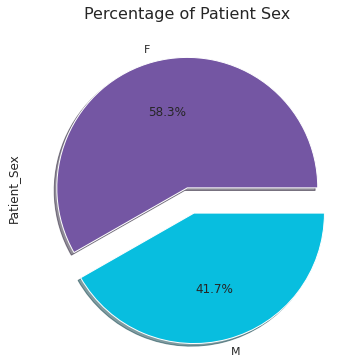

F    2131
M    1527
Name: Patient_Sex, dtype: int64

In [ ]:
value_counts = pd.value_counts(df_clean['Patient_Sex'])
plt.figure(figsize = (6,6))
value_counts.plot(kind = 'pie', explode = [0,0.2],autopct='%1.1f%%', shadow=True)
plt.title('Percentage of Patient Sex',fontdict={'fontsize':16})
plt.show()
value_counts

#### 4.2 Count of Marital Status <a id=27></a>

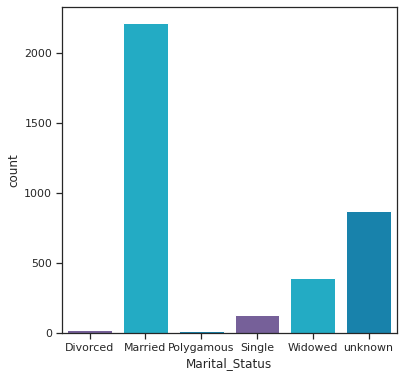

In [ ]:
plt.figure(figsize = (6,6))
sns.countplot(x='Marital_Status',data=df_clean,palette=color_palette)

#### 4.3 Normality Flag For each test Based on Gender <a id=28></a>

Text(0.5, 1.0, 'Normality Flag LDL Based on Gender ')

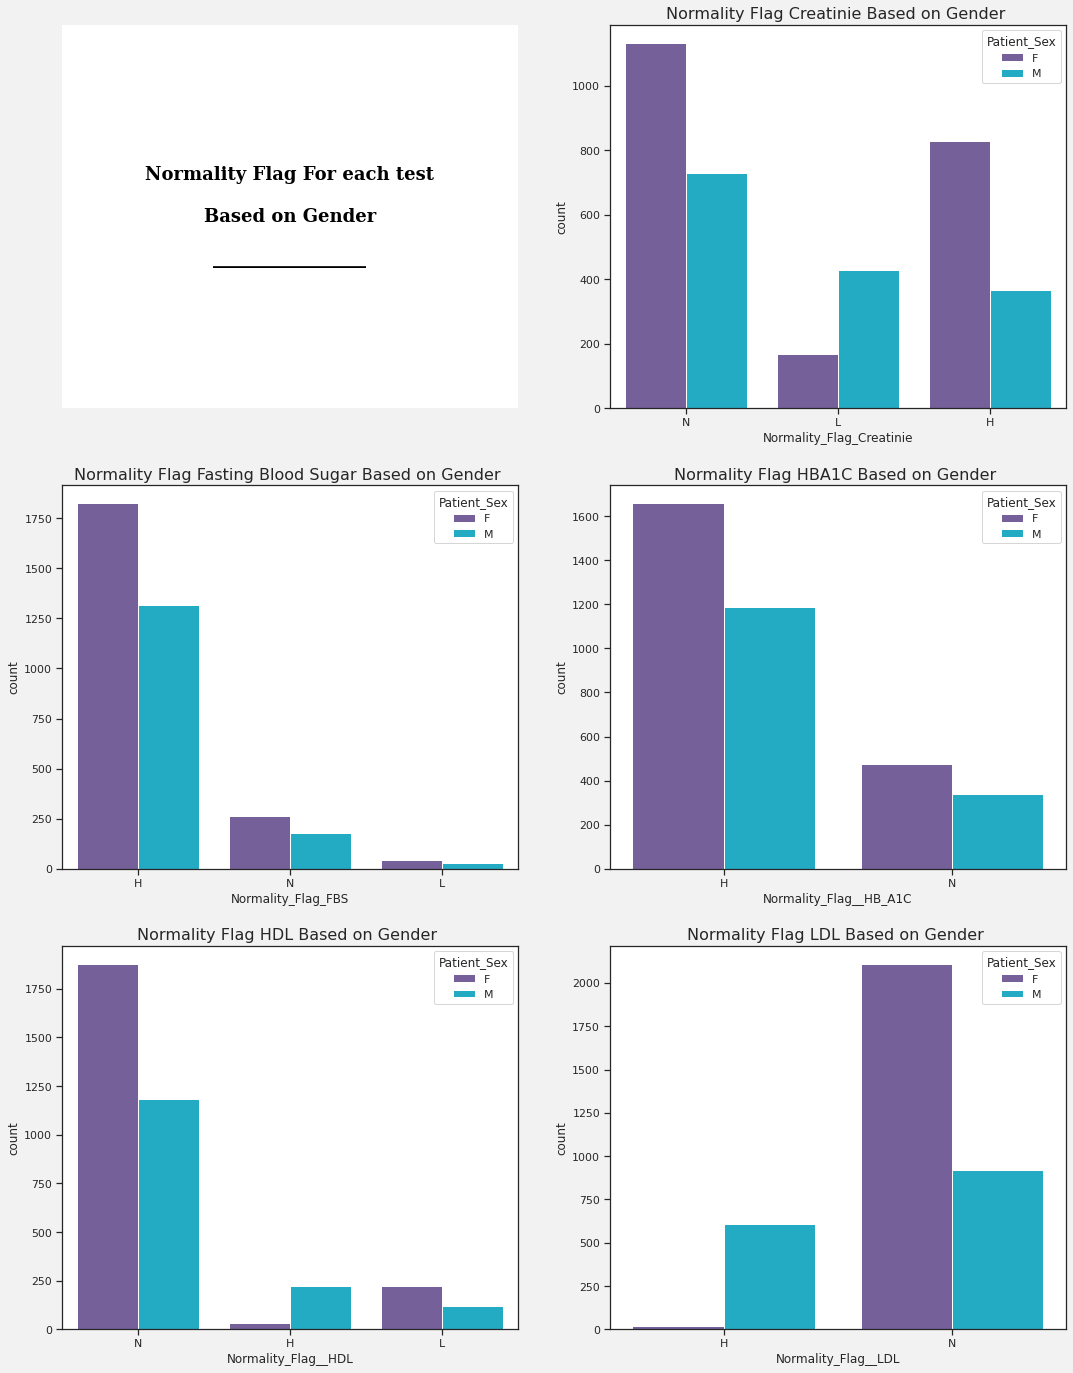

In [ ]:
fig = plt.figure(figsize=(18,24))
fig.patch.set_facecolor(background_color) 
ax0 = plt.subplot2grid((3,2),(0,0))
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False ,color ='#F2F2F2')
ax0.set_xticklabels([])
ax0.set_yticklabels([])
#ax0.background_color('#F2F2F2')

ax0.text(0.5,0.5,
         'Normality Flag For each test\n\nBased on Gender\n\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")
ax1 = plt.subplot2grid((3,2),(0,1))
sns.countplot(x='Normality_Flag_Creatinie',hue='Patient_Sex',data=df_clean ,)
plt.title('Normality Flag Creatinie Based on Gender ',fontdict={'fontsize':16})
ax2 = plt.subplot2grid((3,2),(1,0))
sns.countplot(x='Normality_Flag_FBS',hue='Patient_Sex',data=df_clean)
plt.title('Normality Flag Fasting Blood Sugar Based on Gender ',fontdict={'fontsize':16})
ax3 = plt.subplot2grid((3,2),(1,1))
sns.countplot(x='Normality_Flag__HB_A1C',hue='Patient_Sex',data=df_clean)
plt.title('Normality Flag HBA1C Based on Gender ',fontdict={'fontsize':16})
ax4 = plt.subplot2grid((3,2),(2,0))
sns.countplot(x='Normality_Flag__HDL',hue='Patient_Sex',data=df_clean)
plt.title('Normality Flag HDL Based on Gender ',fontdict={'fontsize':16})
ax5 = plt.subplot2grid((3,2),(2,1))
sns.countplot(x='Normality_Flag__LDL',hue='Patient_Sex',data=df_clean)
plt.title('Normality Flag LDL Based on Gender ',fontdict={'fontsize':16})

#### 4.4 Relationship between features <a id=29></a>

<Figure size 1296x1728 with 0 Axes>

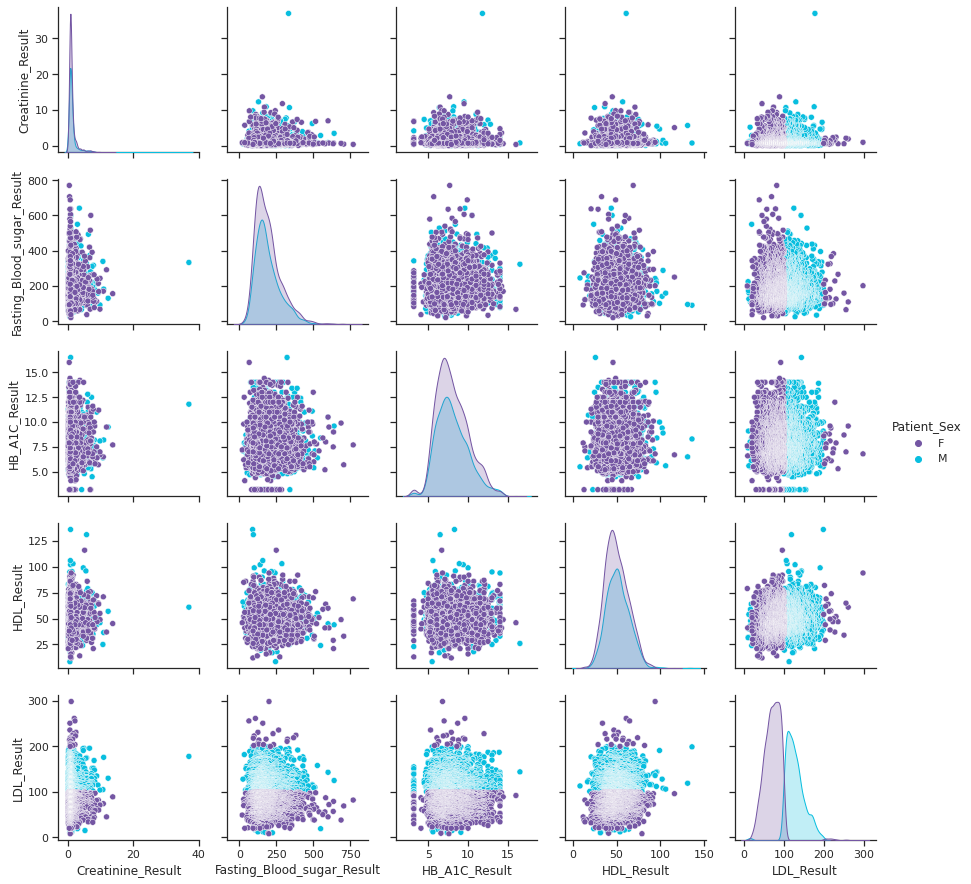

In [ ]:
results=['Patient_Sex','Creatinine_Result','Fasting_Blood_sugar_Result','HB_A1C_Result','HDL_Result','LDL_Result']
fig = plt.figure(figsize=(18,24))
sns.pairplot(df_clean[results],hue = 'Patient_Sex')
plt.show()

#### 4.5 Descriptive Statistics for Results Based on Gender and normality flag <a id=30></a>

Text(0.5, 1.0, 'Descriptive Statistics for Result of LDL \nBased on Gender  and normality flag')

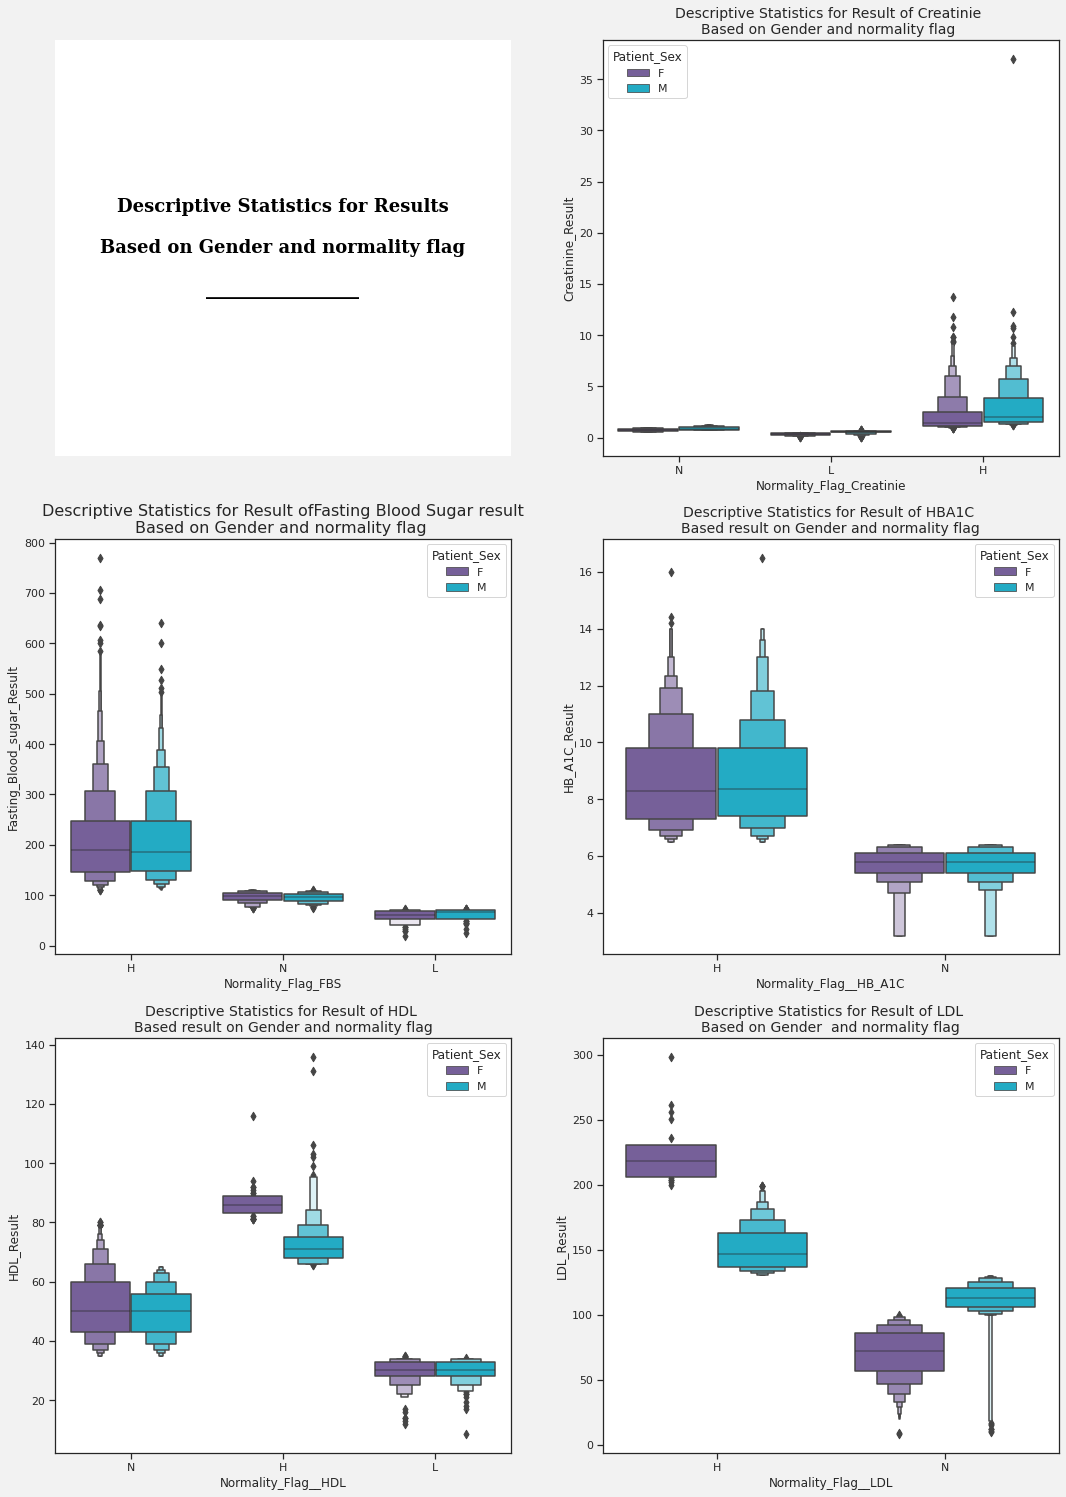

In [ ]:
fig = plt.figure(figsize=(18,26))
fig.patch.set_facecolor(background_color) 
ax0 = plt.subplot2grid((3,2),(0,0))
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False ,color ='#F2F2F2')
ax0.set_xticklabels([])
ax0.set_yticklabels([])
#ax0.background_color('#F2F2F2')

ax0.text(0.5,0.5,
         'Descriptive Statistics for Results\n\nBased on Gender and normality flag\n\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")
ax1 = plt.subplot2grid((3,2),(0,1))
sns.boxenplot(x='Normality_Flag_Creatinie',y='Creatinine_Result',hue='Patient_Sex',data=df_clean)
plt.title('Descriptive Statistics for Result of Creatinie \nBased on Gender and normality flag ',fontdict={'fontsize':14})
ax2 = plt.subplot2grid((3,2),(1,0))
sns.boxenplot(x='Normality_Flag_FBS',y='Fasting_Blood_sugar_Result',hue='Patient_Sex',data=df_clean)
plt.title('Descriptive Statistics for Result ofFasting Blood Sugar result\nBased on Gender and normality flag ',fontdict={'fontsize':16})
ax3 = plt.subplot2grid((3,2),(1,1))
sns.boxenplot(x='Normality_Flag__HB_A1C',y='HB_A1C_Result',hue='Patient_Sex',data=df_clean)
plt.title('Descriptive Statistics for Result of HBA1C \nBased result on Gender and normality flag',fontdict={'fontsize':14})
ax4 = plt.subplot2grid((3,2),(2,0))
sns.boxenplot(x='Normality_Flag__HDL',y='HDL_Result',hue='Patient_Sex',data=df_clean)
plt.title('Descriptive Statistics for Result of HDL \nBased result on Gender and normality flag',fontdict={'fontsize':14})
ax5 = plt.subplot2grid((3,2),(2,1))
sns.boxenplot(x='Normality_Flag__LDL',y='LDL_Result',hue='Patient_Sex',data=df_clean)
plt.title('Descriptive Statistics for Result of LDL \nBased on Gender  and normality flag',fontdict={'fontsize':14})

#### 4.6 Correlation between features based on gender <a id=31></a>

Text(0.5, 1.0, 'Male')

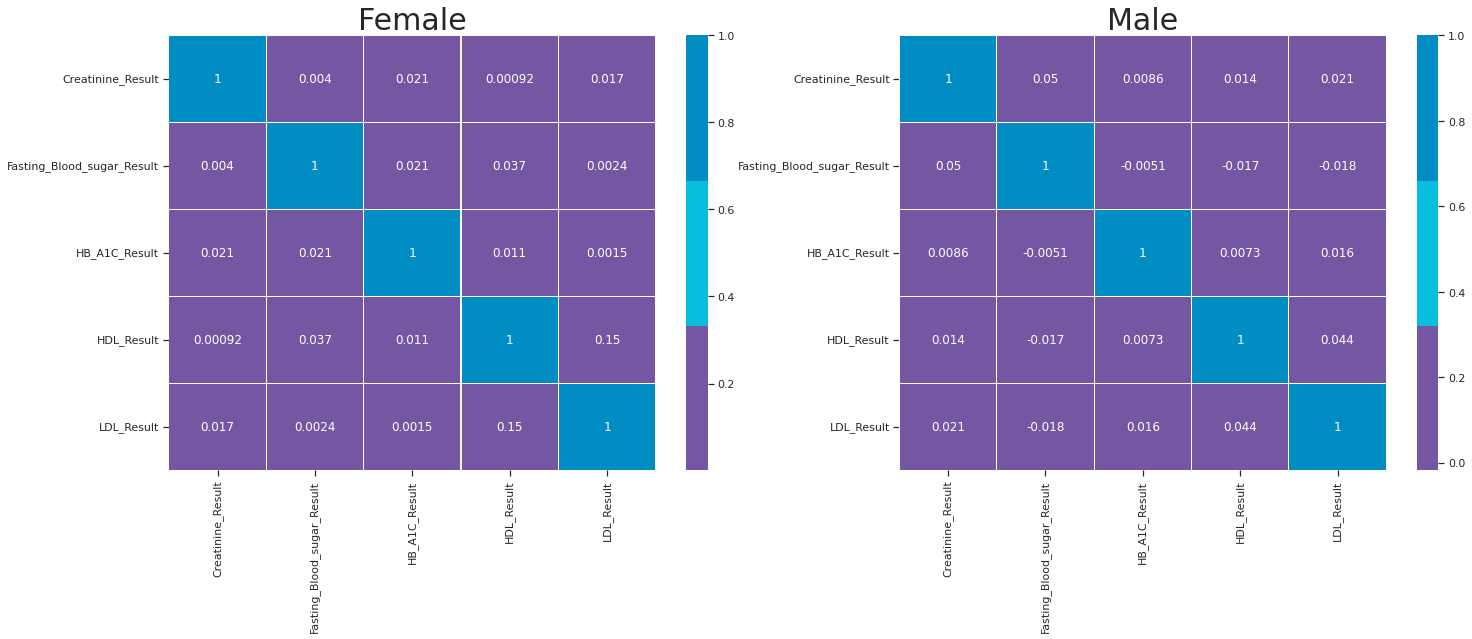

In [ ]:
fig = plt.figure(figsize=(24,8))
result=['Creatinine_Result','Fasting_Blood_sugar_Result','HB_A1C_Result','HDL_Result','LDL_Result']
ax1 = plt.subplot2grid((1,2),(0,0))
df_result_fem=df_female[result]
sns.heatmap(df_result_fem.corr(),linewidths=.1,annot=True,cmap=color_palette)
ax1.set_title('Female',fontdict={'fontsize':30})
ax2 = plt.subplot2grid((1,2),(0,1))
df_result_male=df_male[result]
sns.heatmap(df_result_male.corr(),linewidths=.1,annot=True,cmap=color_palette)
ax2.set_title('Male',fontdict={'fontsize':30})